## Simulation Test

First Let's Generate Some Trajectories / Commands 


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from cycler import *
# plt.style.use('ggplot')
font = {'family' : 'Times New Roman',
        'size'   : 12}
plt.rc('lines', linewidth=2, markersize=1)
plt.rc('font', **font)
plt.rc('grid', c='0.5', ls='-', lw=0.5)
params = {'axes.grid': True, 'axes.labelsize': 12,'axes.titlesize': 12, 'font.size': 12, 'legend.fontsize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

plt.rcParams.update(params)

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

def get_cmap(n, name='Paired'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    #return plt.cm.get_cmap(name, n)
    return plt.get_cmap(name)
cmap = get_cmap(6)



data_path = '/home/alsaibie/UWSim/src/underwater_simulation/dynamics_stack/unit_sim_nonreal/Install/data/'
fontP = FontProperties()

plot_dynamics = True
plot_dynamic_param = True
plot_sensor = True
plot_pos_control = True
plot_att_control = True
plot_errors = True
skip_resample = 1

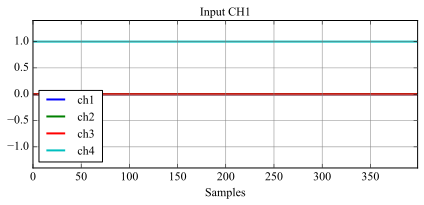

In [26]:
# Will generate a 4 channel output between -1 and 1
# !{'./gen_commands_motors.py'}
!{'./gen_commands_trpy.py'}

input_data = pd.read_csv(data_path + 'generic_input.txt', skipinitialspace=True)
#Let's Plot
fig, axis = plt.subplots(figsize=(6,3), nrows=1, ncols=1)
# plt.gca().set_prop_cycle('color', [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5)])

ax = input_data.loc[::skip_resample, input_data.columns[0:4]].plot(ax=axis, title = "Input CH1", lw=2, ylim=[-1.4,1.4])
# ax = input_data.loc[::skip_resample, input_data.columns[1]].plot(ax=axis, title = "Input CH2", lw=2, ylim=[-1.4,1.4], sharex=ax)
# ax = input_data.loc[::skip_resample, input_data.columns[2]].plot(ax=axis, title = "Input CH3", lw=2, ylim=[-1.4,1.4], sharex=ax)
# ax = input_data.loc[::skip_resample, input_data.columns[3]].plot(ax=axis, title = "Input CH4", lw=2, ylim=[-1.4,1.4], sharex=ax)
ax.set_xlabel('Samples')
fig.tight_layout()

In [34]:
!{'../dynamics_stack/unit_sim_nonreal/Install/bin/unit_sim_nonreal'}

Mass Matrix
   0.359772           0           0           0           0           0
          0    0.383108           0           0           0           0
          0           0    0.383108           0           0           0
          0           0           0 0.000408576           0           0
          0           0           0           0 0.000337109           0
          0           0           0           0           0 0.000545101
B Matrix
    1     1     1     1     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     1     1    -1    -1
-0.03  0.03 -0.03  0.03     0     0     0     0
-0.03  0.03  0.03 -0.03     0     0     0     0
Sub B Matrix
-0.03  0.03 -0.03  0.03
-0.03  0.03  0.03 -0.03
 Unity Dvv Vector: 
  1.06571
  2.22663
   3.5104
0.0005323
0.0005323
0.0005323
 Unity Cv Matrix: 
           0            0            0           -0     0.383108    -0.383108
           0         

,p.x,p.y,p.z,att.x,att.y,att.z,attq.w,attq.x,attq.y,attq.z,...,v.yaw,pdot.x,pdot.y,pdot.z,vdot.x,vdot.y,vdot.z,vdot.r,vdot.p,vdot.yaw
Time (ms),,,,,,,,,,,,,,,,,,,,,
3920,3.93779,0.947015,4.01638,2.43148,3.08224,3.047860,0.935702,-0.348412,0.011512,-0.054214,...,0.915579,1.30849,-0.034620,0.012315,0.453001,-1.29632,0.164861,83.9518,-20.49190,30.52260
3940,3.96400,0.946315,4.01661,2.40086,3.08592,3.072990,0.930939,-0.362495,0.013521,-0.042026,...,1.341330,1.31034,-0.034894,0.010786,-0.006965,-1.71089,-0.799363,64.0258,-44.49000,14.08510
3960,3.99015,0.945636,4.01681,2.39585,3.10666,0.039178,0.930840,-0.364485,0.009126,-0.024600,...,1.528480,1.30401,-0.032888,0.009415,-0.303142,-1.85731,-1.668900,60.0203,-19.54500,3.90938
3980,4.01613,0.945005,4.01699,2.41817,3.13468,0.009686,0.935271,-0.353882,0.001518,-0.005752,...,1.414120,1.29448,-0.030340,0.008309,-0.465184,-1.73712,-1.534860,90.2659,9.49756,-11.50470
4000,4.04198,0.944441,4.01717,2.47750,3.12393,-0.016745,0.945283,-0.326024,-0.005621,0.010794,...,1.202470,1.29223,-0.026347,0.009603,0.064282,-1.56755,-1.162130,108.1040,9.27894,-9.73350


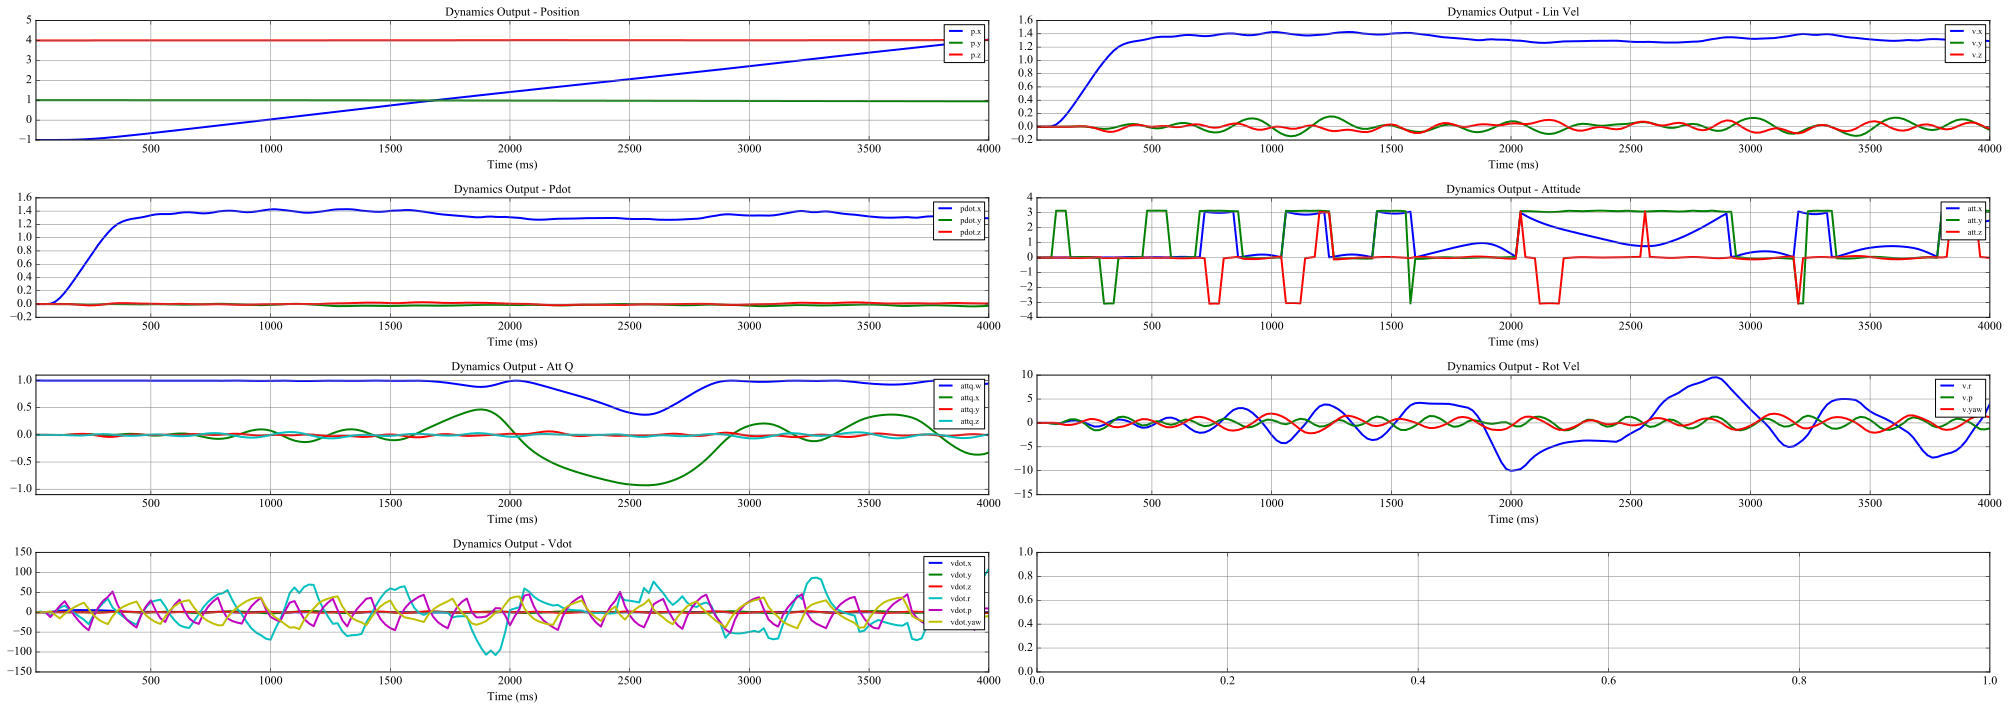

In [35]:
dynamics_data = pd.read_csv(data_path + 'dynamics_output.txt', skipinitialspace=True).loc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_dynamics:
    display(dynamics_data.tail())
    fig, axes = plt.subplots(figsize=(28,10), nrows=4, ncols=2)

    fontP.set_size('small')
    ax_pos = dynamics_data.loc[::skip_resample, 'p.x':'p.z'].plot(ax=axes[0,0], title = 'Dynamics Output - Position').legend(loc=1, prop=fontP)
    ax_vel = dynamics_data.loc[::skip_resample, 'v.x':'v.z'].plot(ax=axes[0,1], title = 'Dynamics Output - Lin Vel').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'pdot.x':'pdot.z'].plot(ax=axes[1,0], title = 'Dynamics Output - Pdot').legend(loc=1, prop=fontP)

    ax_att = dynamics_data.loc[::skip_resample, 'att.x':'att.z'].plot(ax=axes[1,1], title = 'Dynamics Output - Attitude').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'attq.w':'attq.z'].plot(ax=axes[2,0], title = 'Dynamics Output - Att Q', ylim=[-1.1,1.1]).legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'v.r':'v.yaw'].plot(ax=axes[2,1], title = 'Dynamics Output - Rot Vel').legend(loc=1, prop=fontP)
    ax_rot = dynamics_data.loc[::skip_resample, 'vdot.x':'vdot.yaw'].plot(ax=axes[3,0], title = 'Dynamics Output - Vdot').legend(loc=1, prop=fontP)
    fig.tight_layout()

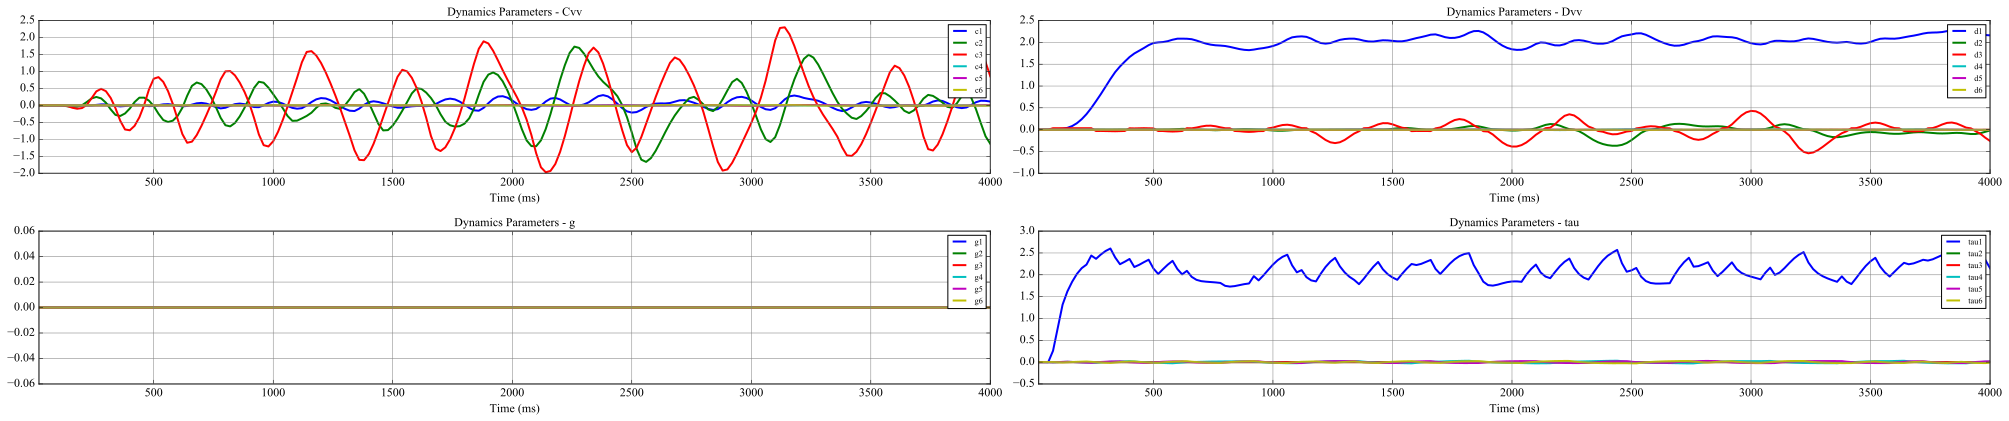

In [29]:
dynamics_param_mv = pd.read_csv(data_path + 'dynamics_param_output_Mv.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
dynamics_param_cv = pd.read_csv(data_path + 'dynamics_param_output_Cv.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
dynamics_param_dv = pd.read_csv(data_path + 'dynamics_param_output_Dv.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
dynamics_param_g = pd.read_csv(data_path + 'dynamics_param_output_g.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
dynamics_param_tau = pd.read_csv(data_path + 'dynamics_param_output_tau.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_dynamic_param:
    #Plot Dynamic Parameters

    # display(dynamics_param_mv.tail())
    # display(dynamics_param_cv.tail())
    # display(dynamics_param_dv.tail())
    # display(dynamics_param_g.tail())
    # display(dynamics_param_tau.tail())
    fig, axes = plt.subplots(figsize=(28,6), nrows=2, ncols=2)
    ax_cv  = dynamics_param_cv.plot(ax=axes[0,0], title = 'Dynamics Parameters - Cvv').legend(loc=1, prop=fontP)
    ax_dv  = dynamics_param_dv.plot(ax=axes[0,1], title = 'Dynamics Parameters - Dvv').legend(loc=1, prop=fontP)
    ax_g   = dynamics_param_g.plot(ax=axes[1,0], title = 'Dynamics Parameters - g').legend(loc=1, prop=fontP)
    ax_tau = dynamics_param_tau.plot(ax=axes[1,1], title = 'Dynamics Parameters - tau').legend(loc=1, prop=fontP)
    fig.tight_layout()

,acc.x,acc.y,acc.z,gyro.x,gyro.y,gyro.z,mag.x,mag.y,mag.z
Time (ms),,,,,,,,,
20,-0.012912,-0.012767,-9.80115,-0.000664,0.000255,0.000475,0.946079,0.092511,0.340742
40,0.000581,-0.000901,-9.81807,0.014183,-0.000943,0.001027,0.932502,0.081350,0.348739
60,0.013652,-0.006993,-9.80914,0.024565,-0.000396,-0.002005,0.925988,0.092837,0.353020
80,0.693246,-0.016571,-9.71329,-0.076312,0.113589,-0.051141,0.922900,0.083043,0.330298
100,2.193110,0.037634,-9.69778,-0.157269,0.222448,0.003316,0.947439,0.080542,0.347199


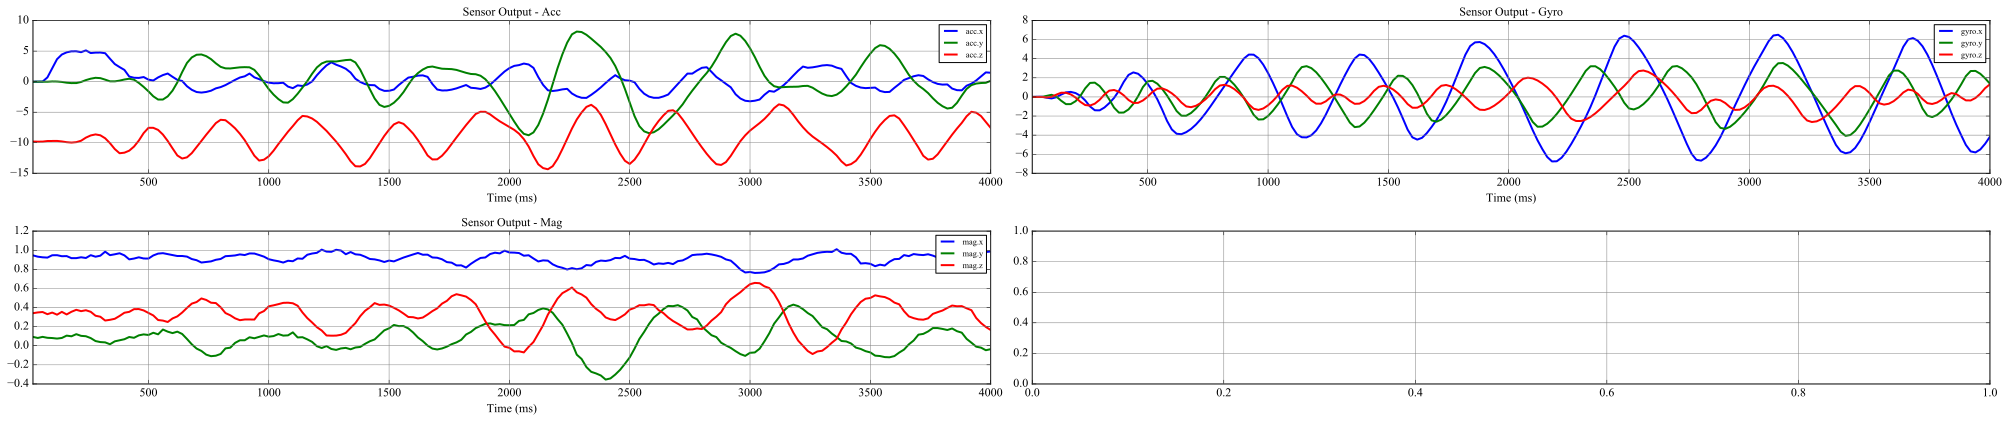

In [30]:
sensor_output = pd.read_csv(data_path + 'sensor_output.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')

if plot_sensor:
    # Sensor Output
    display(sensor_output.head())
    fig, axes = plt.subplots(figsize=(28,6), nrows=2, ncols=2)
    ax_acc = sensor_output.loc[:, 'acc.x':'acc.z'].plot(ax=axes[0,0], title = 'Sensor Output - Acc').legend(loc=1, prop=fontP)
    ax_gyro = sensor_output.loc[:, 'gyro.x':'gyro.z'].plot(ax=axes[0,1], title = 'Sensor Output - Gyro').legend(loc=1, prop=fontP)
    ax_mag = sensor_output.loc[:, 'mag.x':'mag.z'].plot(ax=axes[1,0], title = 'Sensor Output - Mag').legend(loc=1, prop=fontP)
    fig.tight_layout()

,thrust,att.x,att.y,att.z,attq.w,attq.x,attq.y,attq.z
Time (ms),,,,,,,,
3920,1,0,0,0,1,0,0,0
3940,1,0,0,0,1,0,0,0
3960,1,0,0,0,1,0,0,0
3980,1,0,0,0,1,0,0,0
4000,1,0,0,0,1,0,0,0


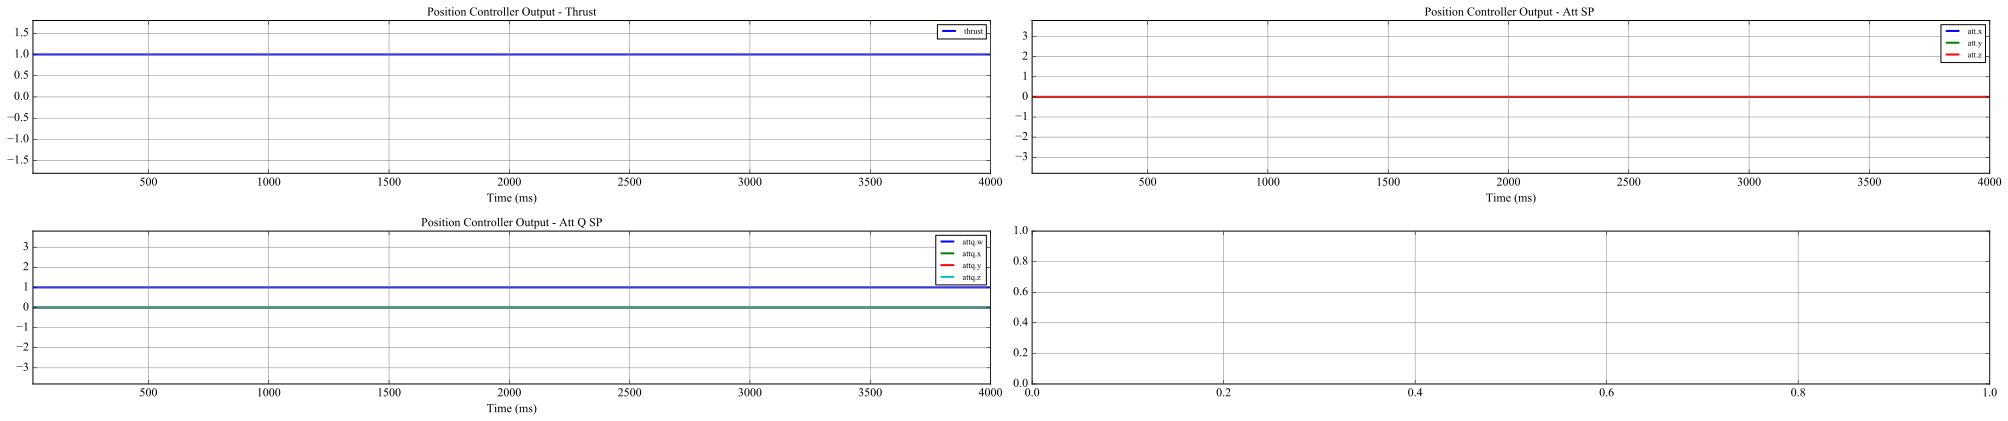

In [31]:
pcontroller_output = pd.read_csv(data_path + 'pcontroller_output.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_pos_control:
    # Position Control Output
    display(pcontroller_output.tail())
    fig, axes = plt.subplots(figsize=(28,6), nrows=2, ncols=2)
    ax_thrustsp = pcontroller_output.loc[:, 'thrust'].plot(ax=axes[0,0], title = 'Position Controller Output - Thrust', ylim=[-1.8,1.8]).legend(loc=1, prop=fontP)
    ax_attsp = pcontroller_output.loc[:, 'att.x':'att.z'].plot(ax=axes[0,1], title = 'Position Controller Output - Att SP ', ylim=[-3.8,3.8]).legend(loc=1, prop=fontP)
    ax_attqsp = pcontroller_output.loc[:, 'attq.w':'attq.z'].plot(ax=axes[1,0], title = 'Position Controller Output - Att Q SP', ylim=[-3.8,3.8]).legend(loc=1, prop=fontP)
    fig.tight_layout()

,thrust,rate_sp.x,rate_sp.y,rate_sp.z,tau_sp.x,tau_sp.y,tau_sp.z,m.1,m.2,m.3,m.4
Time (ms),,,,,,,,,,,
20,1,0.000000,0.000000,0.000000,0.000003,1.527550e-07,2.852450e-07,0.392540,0.957040,0.460710,0.460710
40,1,-0.000057,0.000000,0.000000,-0.000077,-5.655760e-07,6.164400e-07,0.447967,0.447968,0.969783,0.405283
60,1,-0.000415,0.000000,0.000000,-0.000167,-2.378190e-07,-1.202890e-06,0.832143,0.267643,0.885606,0.885608
80,1,-0.000192,0.001107,-0.000299,0.000363,7.435510e-05,-3.236000e-05,0.885548,0.885665,0.267644,0.832144
100,1,0.001837,0.006927,-0.000821,0.000983,1.722590e-04,-2.605760e-06,0.885364,0.885839,0.267649,0.832148


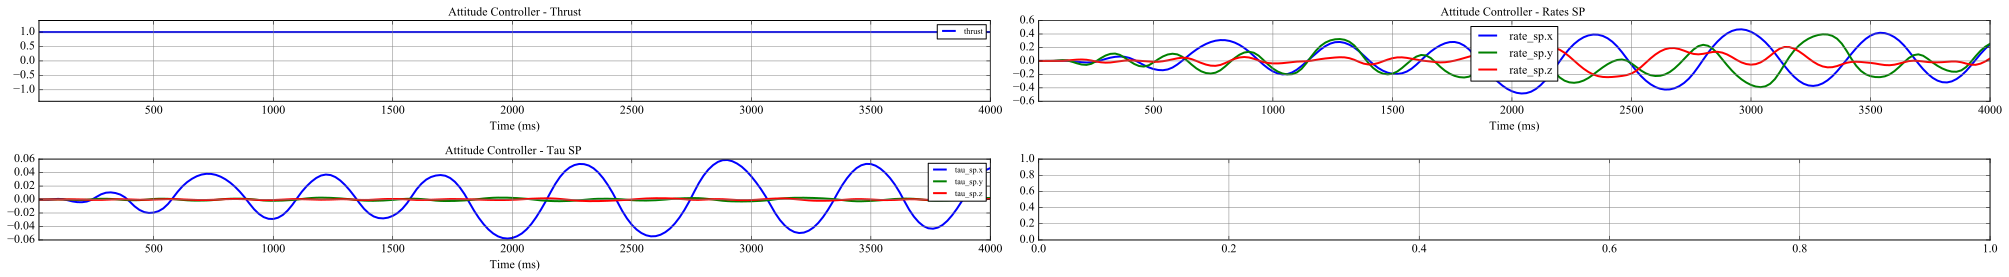

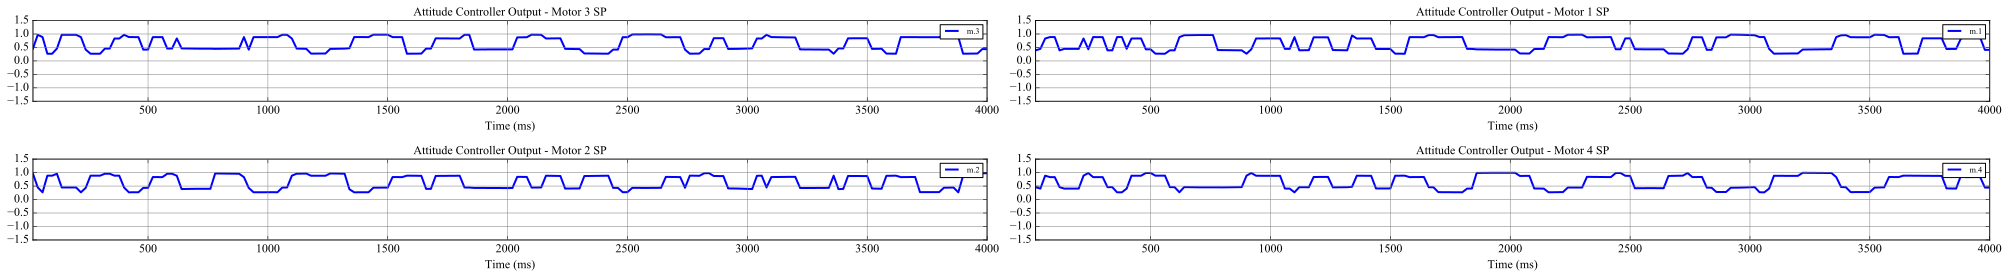

In [32]:
acontroller_output = pd.read_csv(data_path + 'acontroller_output.txt', skipinitialspace=True).iloc[::skip_resample, :].rename(columns={'time' : 'Time (ms)'}).set_index('Time (ms)')
if plot_att_control:
    plot_skip=1
    # Attitude Control Output
    display(acontroller_output.head())
    fig, axes = plt.subplots(figsize=(28,4), nrows=2, ncols=2)
    ax_thrustsp = acontroller_output.loc[::plot_skip, 'thrust'].plot(ax=axes[0,0], title = 'Attitude Controller - Thrust', ylim=[-1.4,1.4]).legend(loc=1, prop=fontP)
    ax_ratessp = acontroller_output.loc[::plot_skip, 'rate_sp.x':'rate_sp.z'].plot(ax=axes[0,1], title = 'Attitude Controller - Rates SP ')
    ax_ratessp = acontroller_output.loc[::plot_skip, 'tau_sp.x':'tau_sp.z'].plot(ax=axes[1,0], title = 'Attitude Controller - Tau SP ')
    ax_ratessp.legend(loc=1, prop=fontP)
    fig.tight_layout()

    fig, axes = plt.subplots(figsize=(28,4), nrows=2, ncols=2)
    ax_motsp = acontroller_output.loc[::plot_skip, 'm.3'].plot(ax=axes[0,0], title = 'Attitude Controller Output - Motor 3 SP', ylim=[-1.5,1.5]).legend(loc=1, prop=fontP)
    ax_motsp = acontroller_output.loc[::plot_skip, 'm.1'].plot(ax=axes[0,1], title = 'Attitude Controller Output - Motor 1 SP', ylim=[-1.5,1.5]).legend(loc=1, prop=fontP)
    ax_motsp = acontroller_output.loc[::plot_skip, 'm.2'].plot(ax=axes[1,0], title = 'Attitude Controller Output - Motor 2 SP', ylim=[-1.5,1.5]).legend(loc=1, prop=fontP)
    ax_motsp = acontroller_output.loc[::plot_skip, 'm.4'].plot(ax=axes[1,1], title = 'Attitude Controller Output - Motor 4 SP', ylim=[-1.5,1.5]).legend(loc=1, prop=fontP)
    fig.tight_layout()

,att.x,att.y,att.z
Time (ms),,,
3920,-0.090138,-0.014144,-0.074654
3940,-0.021274,-3.091930,3.063860
3960,-3.010550,3.032010,3.074820
3980,-2.907990,2.982610,0.040346
4000,-2.816840,2.947480,0.000995


,rate_sp.x,rate_sp.y,rate_sp.z
Time (ms),,,
3920,5.635365,2.698907,-0.426153
3940,5.826293,2.795215,-0.169258
3960,5.605562,2.575641,0.294175
3980,5.088189,2.159806,0.910117
4000,4.412386,1.642238,1.360223


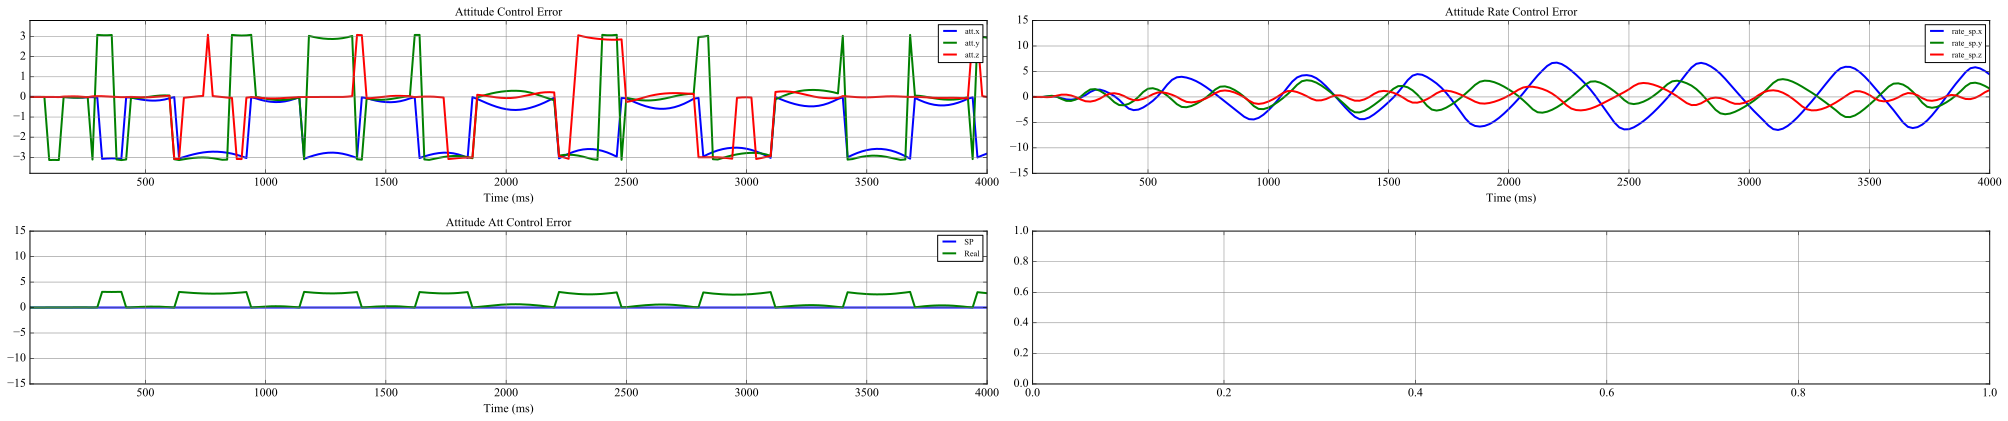

In [33]:
# Error State
if plot_errors:
    plot_skip=1
    attitude_error = pcontroller_output.loc[:, 'att.x':'att.z'] - (dynamics_data.loc[:,'att.x':'att.z'])
    display(attitude_error.tail())
    rate_error = acontroller_output.loc[:, 'rate_sp.x':'rate_sp.z'] - (dynamics_data.loc[:,'v.r':'v.yaw'].values)
    display(rate_error.tail())
    fig, axes = plt.subplots(figsize=(28,6), nrows=2, ncols=2)
    ax_error_attitude = attitude_error.loc[::plot_skip, 'att.x':'att.z'].plot(ax=axes[0,0], title = 'Attitude Control Error', ylim=[-3.8,3.8])
    ax_error_attitude.legend(loc=1, prop=fontP)
    ax_rate_error = rate_error.loc[::plot_skip, 'rate_sp.x':'rate_sp.z'].plot(ax=axes[0,1], title = 'Attitude Rate Control Error', ylim=[-15,15]).legend(loc=1, prop=fontP)
    ax_att = pcontroller_output.loc[:, 'att.x'].plot(ax=axes[1,0], title = 'Attitude Att Control Error', label='SP',ylim=[-15,15])
    ax_att = dynamics_data.loc[:, 'att.x'].plot(ax=axes[1,0], title = 'Attitude Att Control Error', label='Real',ylim=[-15,15]).legend(loc=1, prop=fontP)
    fig.tight_layout()
    
    #Compare quaternions then cover the differernce 

In [716]:
line = ax_error_attitude.lines[0]
